# Custom weighted mean visualisation

import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = [80,40,20,10]
points, label, centers = make_blobs(n_samples=n_samples, random_state=42, return_centers=True)
mean = numpy.mean(points, axis=0) 
y_pred = KMeans(n_clusters=len(n_samples)).fit_predict(points)

bary = centers[0]

color_matching = dict(zip(list(set(y_pred)),[n_samples.index(elem) for elem in [sum(y_pred==i) for i in set(y_pred)]]))
w1 = [1 / (numpy.linalg.norm(p-mean)**2 + numpy.finfo(numpy.float32).tiny) for p in points]
w2 = [numpy.exp(- numpy.linalg.norm(p-mean)**2) for p in points]
super_mean1 = numpy.average(points, axis=0, weights=w1)
super_mean2 = numpy.average(points, axis=0, weights=w2)

plt.scatter([x for x,y in points], [y for x,y in points], label="vectors", c=[color_matching[label] for label in y_pred])
plt.scatter(mean[0], mean[1], label="simple mean", marker='+', s=200)
plt.scatter(super_mean1[0], super_mean1[1], label= "custom

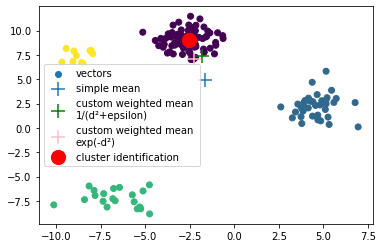

In [2]:
%cat plot.py
%run -i plot.py